UMPM


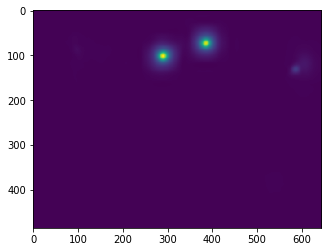

In [11]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../samples')
import paf_loader
from os.path import join, isdir
import numpy as np
import cv2
from cselect import color as cs

from mvpose.data import umpm

root = join(Settings['data_root'], 'pak')
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

# **************************** #
FRAME = 0
# **************************** #

X, Y, Calib = umpm.get(root, 'p2_free_1', user, pwd)

Im = np.array([X[0][FRAME], X[1][FRAME], X[2][FRAME], X[3][FRAME]])

heatmaps, pafs = paf_loader.load_confidence_map_and_paf('umpm', Im, FRAME)


hm0 = heatmaps[0,:,:,1]

plt.imshow(hm0)
plt.show()

In [5]:
from skimage.feature import peak_local_max
import mvpose.geometry.geometry as gm
import cv2
import numpy as np
from time import time


def get_all_peaks(heatmap, threshold):
    """
    extracts peaks from the heatmap
    :param heatmap: h x w x m
    :param threshold:
    :return: [
            [ (x,y,score), (x,y,score),... ]  # Nose
            ...
    ]
    """
    # TODO: this function is slow ~0.3 seconds per call
    _, _, n_joints = heatmap.shape

    peaks = []
    for i in range(n_joints):
        hm = heatmap[:,:,i]
        local_peaks = peak_local_max(hm, threshold_abs=threshold)
        found_peaks = []
        for x,y in local_peaks:
            found_peaks.append((y,x,hm[x,y]))
        peaks.append(np.array(found_peaks))
    return peaks

_start = time()
get_all_peaks(heatmaps[0], 0.1)
_end = time()
print('elapsed', _end - _start)

elapsed 0.2568366527557373
